1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

In simple linear regression, we are predicting one variable (the outcome variable, or y) based on the value of another variable (the predictor/independent variable, x) based on their linear relationship. 
The intercept is the value of y when x is 0, and the slope tells us the change in y after a 1 unit increase in x.
The error term is to account for there not being 100% linearity for all x-y points. It is assumed this follows a normal distribution, with a mean of 0 and a standard deviation of the data. 

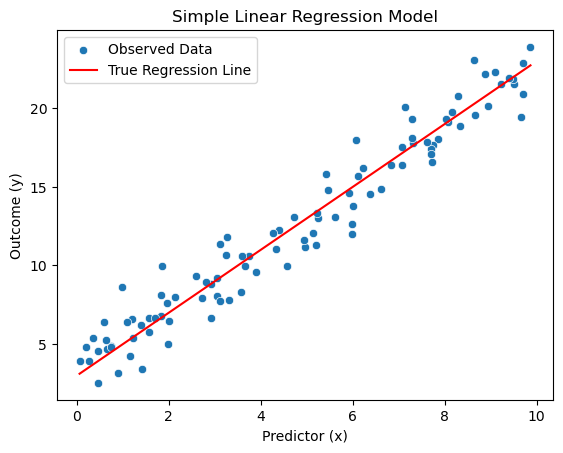

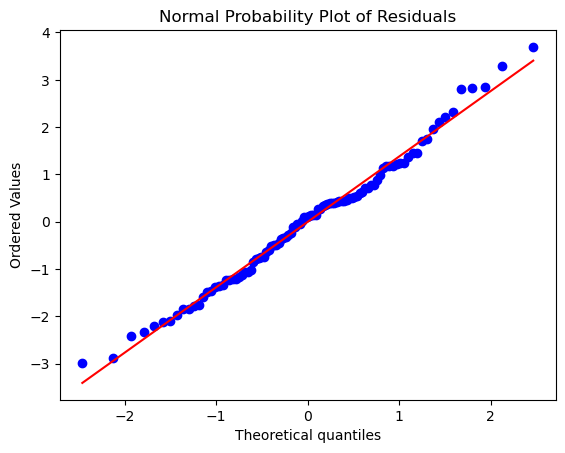

In [35]:
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define model parameters
beta_0 = 3  # Intercept
beta_1 = 2  # Slope
sigma = 1.5  # Standard deviation of error term

# Generate predictor values (x) as a random sample
x = np.random.uniform(0, 10, 100)

# Generate error term (epsilon) as a normal distribution
epsilon = np.random.normal(0, sigma, size=x.shape[0])

# Calculate outcome (y) based on the SLR model
y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame for easier plotting
data = pd.DataFrame({'x': x, 'y': y})

# Plot observed data with the true regression line
sns.scatterplot(data=data, x='x', y='y', label='Observed Data')
sns.lineplot(x=x, y=beta_0 + beta_1 * x, color='red', label='True Regression Line')

# Show plot
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()

# Check if residuals (y - predicted y) follow a normal distribution
predicted_y = beta_0 + beta_1 * x
residuals = y - predicted_y

# Visualize residuals for normality
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

In [21]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define model parameters
beta_0 = 3  # Intercept
beta_1 = 2  # Slope
sigma = 1.5  # Standard deviation of error term

# Generate predictor values (x) and error term (epsilon)
x = np.random.uniform(0, 10, 100)
epsilon = np.random.normal(0, sigma, size=x.shape[0])

# Calculate outcome (Y) based on the SLR model
Y = beta_0 + beta_1 * x + epsilon

# Create DataFrame with the column names "x" and "Y"
df = pd.DataFrame({'x': x, 'Y': Y})

In [22]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# calculates the slope and intercept coefficients, sets up the regression model and fits it (finds the best values
# of B0 and B1 so that residuals are minimized and so that the best line is chosen. 
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  #overview of the fitted model, including rsquared, standard errors, p-values, etc.
fitted_model.summary().tables[1]  #gives the second table of the fitted model summary (estimated coefficients)
fitted_model.params  #returns the parameters (estimated coefficients) and presents them as a series
fitted_model.params.values  #returns the parameters (estimated coefficients) and presents them as an array
fitted_model.rsquared  #returns r-squared value (how accurate the model is on a scale of 0 to 1).

# adds trendline and title
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

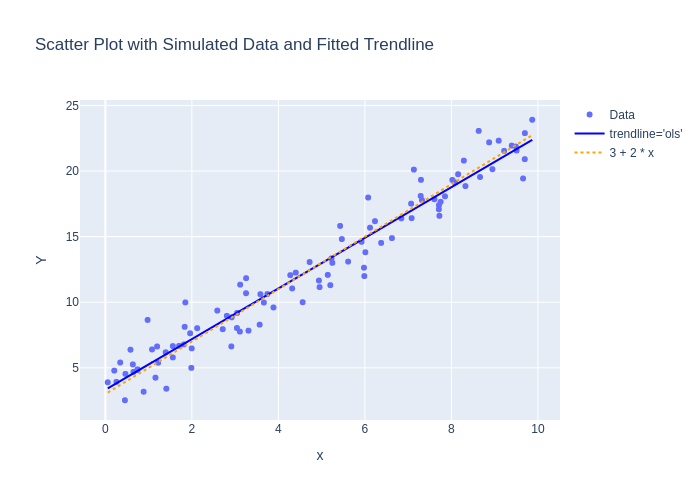

In [23]:
import plotly.graph_objects as go

# Create a figure and add the scatter plot from Question 1
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the trendline (fitted values from the model) from Question 2
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Show the figure
fig.update_layout(title="Scatter Plot with Simulated Data and Fitted Trendline",
                 xaxis_title="x", yaxis_title="Y")
fig.show()

# Define model parameters for the true line
beta0 = 3  # Intercept
beta1 = 2  # Slope
sigma = 1.5  # Standard deviation of error term

# adds the true regression line using the calculated actual parameters, not estimates (not affected by random
# variation). 
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

There is a random sampling variation that changes the Y values due to the error term in the first question's line, but the second question smooths out this variation by choosing B0 and B1 based on which one will provide the least residuals. The trendline added represents the general trend without being influenced by the random errors. 
The orange line is the true line, and the trendline is calculated using OLS. It is the best linear approximation. 

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

fitted_model.fittedvalues are the predicted Y-values from the regression model. 

They are calculated by applying the estimated intercept and slope (stored in fitted_model.params) to each x-value in the dataset:
Yhat(i) = intercept + (slope multipied by x(i))

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

The fitted line is chosen to ensure that the residuals are minimized (the difference between the y and y-hat, or predicted, values). Each residual shows the vertical difference between the actual and predicted y-value. 
OLS ensures that nothing is cancelled out in summing as when it is squared they are all positive. Larger differences will have a bigger impact so the fitted line is more accurate after using OLS. 

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.**
R-squared is the difference between the total variation in Y and the variation the model predicts. 
Measures how well-fitted the values are (tells us what % of Y's variation can be attributed to x via the model). 
So, it serves as a model of accuracy, the closer it is to 1, the more accurate the model is, and the closer it is to 0, the less accurate the model is. 
R-squared is also the square of the correlation between Y and Y-hat, capturing the strength of the linear relationship. 

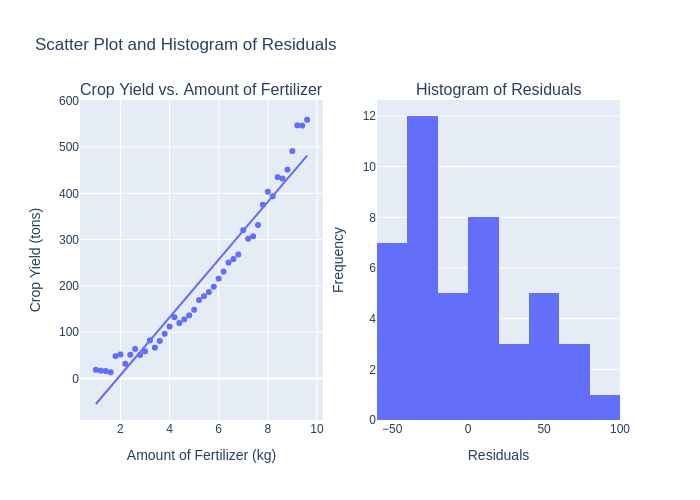

In [24]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE fig.show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

SLR assumes a linear relationship, but the data doesn't follow a linear relationship, follows a more curved one. 
SLR assumes the residuals are normally distributed, but the histogram of residuals shows a skew, so the residuals aren't perfectly normal.

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

H0: B1 = 0 (no linear association between X and Y on average)
H1: B1 ≠ 0 (there is a linear association between X and Y on average)

In [25]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:46:30   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P>|t| = 0.000..., which is very strong evidence against the null hypothesis, so we reject H0. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


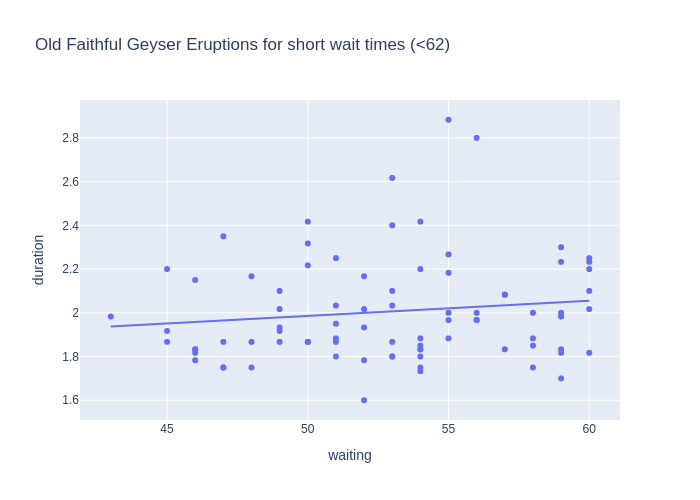

In [36]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

The p-value for this is 0.238 > 0.1, so there is no evidence against the null hypothesis, so there is insufficient evidence to reject H0, and B1 is indeed = 0, implying that there is no association between wait time and eruption duration during shorter waiting times.

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

- create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;
- 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


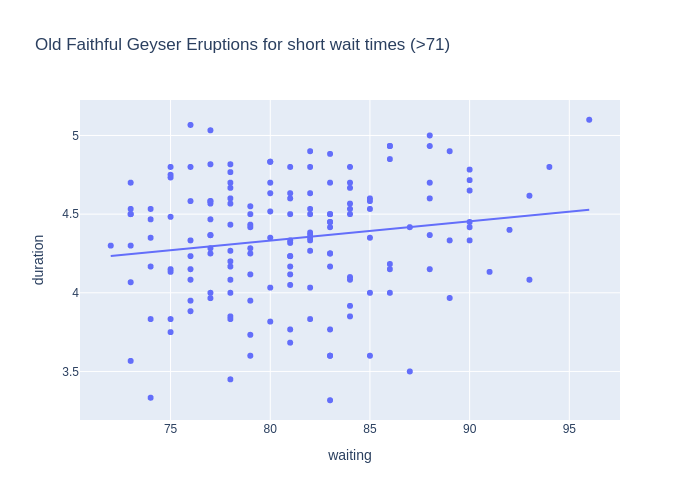

In [37]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [28]:
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the long wait condition and subset data
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Collect slope coefficients from bootstrapped models
bootstrapped_slope_coefficients = []

for _ in range(num_bootstrap_samples):
    # Create a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait.sum(), replace=True)
    # Fit the model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert to a numpy array for quantile calculations
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Calculate a 95% bootstrapped confidence interval for the slope
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Simulate under the null hypothesis: no linear association
old_faithful_simulation = long_wait_data.copy()
simulated_slope_coefficients = []

for _ in range(num_bootstrap_samples):
    # Assign simulated 'duration' values under null hypothesis
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    # Fit the model to the simulated data
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    # Collect the slope coefficient
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for comparison
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Calculate the p-value based on the simulated null distribution
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Output the results
print("95% Bootstrapped Confidence Interval for Slope:", bootstrap_ci)
print("Simulated p-value:", simulated_p_value)


95% Bootstrapped Confidence Interval for Slope: [0.00020023 0.02316955]
Simulated p-value: 0.039


/tmp/ipykernel_52/4080533581.py:50: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0 is not contained within the 95% confidence interval.
The p-value is 0.026, which is < 0.05, so there is moderate evidence against the null hypothesis and we reject it. 

11. This is using an indicator variable (kind) for the wait times to split them between short and long.

**smf.ols('duration ~ waiting', data=old_faithful)** - initial model considers entire dataset and estimates a linear relationship between waiting time and eruption duration, and doesn't distinguish between short and long wait times.
**smf.ols('duration ~ waiting', data=old_faithful[short_wait])** - examines whether there is a linear association between short wait times and eruption duration
**smf.ols('duration ~ waiting', data=old_faithful[long_wait])** - examines whether there is a linear association between longer wait times and eruption duration

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


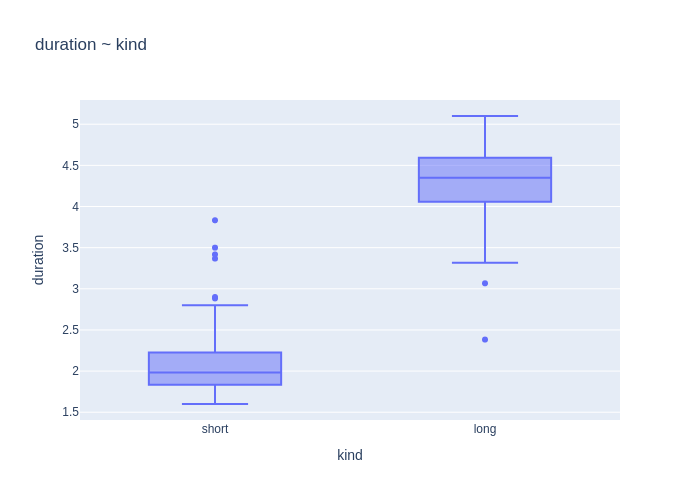

In [29]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

This models 'waiting' as a categorical variable (short vs long) instead of a continuous predictor, comparing short's mean duration and long's mean duration.
Allows us to test for a significant difference without assuming linearity.
Short is the reference group, so it estimates how much higher or lower the mean duration is for long relative to short. The box plots help us visualize this.

H0: There is no significant difference in mean duration between short and long waits (kind coefficient = 0)

H1: There is a significant difference in mean duration between short and long waits (kind coefficient ≠ 0)

The p-value is 0.0000, so we reject H0, and there is a significant difference in mean duration between short and long waits (kind coefficient ≠ 0).

12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.


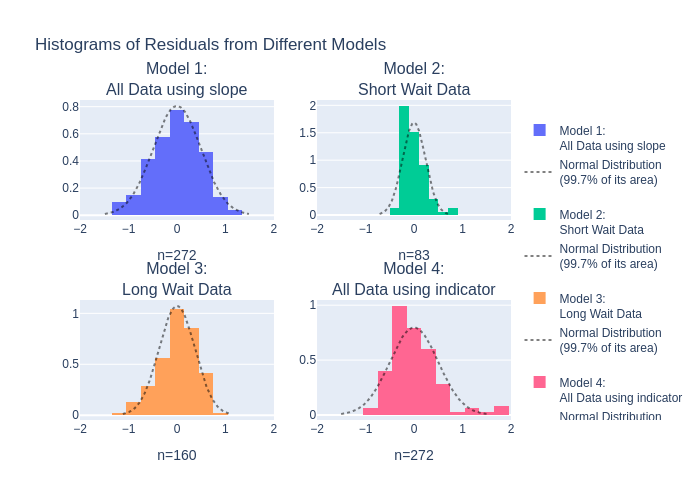

In [38]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 1 is wrong as it combines both groups so doesn't show the hidden variability between short and long. Model 2 is more right-skewed so doesn't follow normality. Model 4 reflects bimodality due to combining both groups, so there isn't a single norma distribution. 
So, model 3 is most suitable and plausible.

13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.


In [32]:
#(A)
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define 'kind' based on waiting time
long_wait_limit = 71
old_faithful['kind'] = np.where(old_faithful['waiting'] > long_wait_limit, 'long', 'short')

# Calculate the observed mean difference
observed_means = old_faithful.groupby('kind')['duration'].mean()
# Ensure the order is 'long' - 'short'
observed_statistic = observed_means.loc['long'] - observed_means.loc['short']

# Number of permutations
num_permutations = 1000
permuted_statistics = []

for _ in range(num_permutations):
    # Shuffle the 'kind' labels without replacement
    old_faithful_shuffled = old_faithful.assign(
        kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values
    )
    # Calculate the mean durations for shuffled groups
    shuffled_means = old_faithful_shuffled.groupby('kind_shuffled')['duration'].mean()
    # Calculate the mean difference statistic
    # Ensure the order is 'long' - 'short'
    permuted_statistic = shuffled_means.loc['long'] - shuffled_means.loc['short']
    permuted_statistics.append(permuted_statistic)

# Convert to numpy array for calculations
permuted_statistics = np.array(permuted_statistics)

# Calculate the p-value
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()

print(f"Observed mean difference (long - short): {observed_statistic}")
print(f"P-value from permutation test: {p_value}")


Observed mean difference (long - short): 2.0801883928571425
P-value from permutation test: 0.0


So, since the p-value is 0.0, then we can reject H0

(a) Explain how the sampling approaches work for the two simulations.
Permutation testing: Shuffle the labels (short and long) of the groups to break any association between the label and the duration values. This approach assesses how likely it is to observe a mean difference as extreme as our observed difference if there were no real association between wait type and eruption duration. Calculate the difference in mean duration for each permuation, compare observed difference and calculate p-value. 
Bootstrapping: you bootstrap the sample repeatedly within the same group separately from each other to generate new sets, assuming the sample represents the population. We then get a range of mean differences which is now our new distribution, so we get an inference for the true mean difference. 

(b) 
- Similar: Both compare the difference in mean durations between short and long, either estimating or testing the significance of the difference
- Diff: Permutation is non-parametric, uses shuffling and breaks association. Bootstrapping provides an inference for the true difference. The indicator variable model uses an indicator variable (kind) assumes linearity and provides an estimate and p-value for the group difference (coefficient of kind)

In [33]:
#(B)
import numpy as np
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define "kind" based on waiting time threshold
long_wait_limit = 71
old_faithful['kind'] = np.where(old_faithful['waiting'] > long_wait_limit, 'long', 'short')

# Define a function to perform "two-sample" bootstrapping within each group
def bootstrap_mean_difference(data, num_bootstraps=1000):
    bootstrapped_mean_differences = []

    for _ in range(num_bootstraps):
        # Perform bootstrapping within each group
        bootstrapped_data = data.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
        
        # Calculate the mean difference for this bootstrap sample
        bootstrapped_diff = bootstrapped_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
        bootstrapped_mean_differences.append(bootstrapped_diff)

    # Compute the 95% confidence interval
    bootstrap_ci = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
    return bootstrap_ci

# Calculate the 95% bootstrap confidence interval
bootstrap_ci = bootstrap_mean_difference(old_faithful)
print("95% Bootstrap Confidence Interval for Mean Difference:", bootstrap_ci)


95% Bootstrap Confidence Interval for Mean Difference: [1.94332953 2.21214319]


14. Yes

Chat history:https://chatgpt.com/share/672d5680-108c-8010-bc92-de79aefce30d
Summary:
In this chat, we discussed and implemented a two-sample bootstrap to calculate a 95% confidence interval for the mean difference in geyser eruption duration between "short" and "long" waiting times. Key steps included:

Setting up the Dataset: We categorized waiting times into "short" and "long" groups based on a threshold, adding a kind column.
Two-Sample Bootstrapping: For each bootstrap iteration, we resampled within each group, calculated the mean duration difference, and repeated this process for 1000 iterations.
Calculating the Confidence Interval: Finally, we used the distribution of bootstrapped mean differences to calculate the 95% confidence interval with np.quantile.
This two-sample bootstrap approach provides an estimate of the interval within which the true mean difference likely lies. We also compared this approach to permutation testing and the indicator variable model, discussing how each method helps assess the relationship between group labels and eruption duration.